In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import netCDF4
import os
from tqdm import tqdm, trange
import itertools

import cartopy.crs as ccrs

import matplotlib.pyplot as graph
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm

In [ ]:
ds = xr.open_dataset('/mnt/c/Users/imrit/Downloads/cru_ts4.05.1901.2020.tmp.dat.nc/cru_ts4.05.1901.2020.tmp.dat.nc', 
                     decode_times=False)
# df = netCDF4.Dataset('/mnt/c/Users/imrit/Downloads/cru_ts4.05.1901.2020.tmp.dat.nc/cru_ts4.05.1901.2020.tmp.dat.nc')

In [ ]:
df = ds.to_dataframe()

In [ ]:
latbounds = [ 40 , 43 ]
lonbounds = [ -96 , -89 ] # degrees east ? 
lats = f.variables['latitude'][:] 
lons = f.variables['longitude'][:]

# latitude lower and upper index
latli = np.argmin( np.abs( lats - latbounds[0] ) )
latui = np.argmin( np.abs( lats - latbounds[1] ) ) 

# longitude lower and upper index
lonli = np.argmin( np.abs( lons - lonbounds[0] ) )
lonui = np.argmin( np.abs( lons - lonbounds[1] ) )  

In [ ]:
airSubset = f.variables['air'][ : , latli:latui , lonli:lonui ] 

In [ ]:
ds = xr.open_dataset('/mnt/c/Users/imrit/Downloads/cru_ts4.05.1901.2020.tmp.dat.nc/cru_ts4.05.1901.2020.tmp.dat.nc',
                     decode_cf=False)
lat_bnds, lon_bnds = [10, 90], [-180, -30]
ds.sel(lat=slice(*lat_bnds), lon=slice(*lon_bnds))

In [ ]:
df = ds.to_dataframe()

# Formatting csv from R

In [2]:
df = pd.read_csv('/mnt/c/Users/imrit/Downloads/CRU_files/cru_temp_cld_1901_2020.csv')
df.drop(columns = ['Unnamed: 0'], inplace=True)
df.head()

,x,y,X1901.01.16,X1901.02.15,X1901.03.16,X1901.04.16,X1901.05.16,X1901.06.16,X1901.07.16,X1901.08.16,...,X2020.02.15,X2020.03.16,X2020.04.16,X2020.05.16,X2020.06.16,X2020.07.16,X2020.08.16,X2020.09.16,X2020.10.16,X2020.11.16
0,-179.75,89.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-179.25,89.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-178.75,89.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-178.25,89.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-177.75,89.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# x = df.columns[2:].str.replace('.16', '', regex=True)
# x = x.str.replace('.15', '', regex=True)

backup_cols = df.columns
x = []
months_dict = {'01': 'jan', '02': 'feb', '03': 'mar', '04': 'apr', '05': 'may', '06': 'jun', '07': 'jul', '08': 'aug', 
               '09': 'sep', '10': 'oct', '11': 'nov', '12': 'dec'}

for date in backup_cols[2:]:
    year, month_num, _ = date.split('.')
    year = year.replace('X', '')
    month = 'mean_cld_' + months_dict[month_num]
    date = '-'.join([year, month])
    x.append(date)

In [4]:
col_names = ['x', 'y'] + x
df.columns = col_names

In [5]:
# df = df.loc[(df['x'] > -96) &  (df['x'] < -75) & (df['y'] > 41) &  (df['y'] < 57)]
display(df.head())

,x,y,1901-mean_cld_jan,1901-mean_cld_feb,1901-mean_cld_mar,1901-mean_cld_apr,1901-mean_cld_may,1901-mean_cld_jun,1901-mean_cld_jul,1901-mean_cld_aug,...,2020-mean_cld_feb,2020-mean_cld_mar,2020-mean_cld_apr,2020-mean_cld_may,2020-mean_cld_jun,2020-mean_cld_jul,2020-mean_cld_aug,2020-mean_cld_sep,2020-mean_cld_oct,2020-mean_cld_nov
0,-179.75,89.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-179.25,89.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-178.75,89.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-178.25,89.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-177.75,89.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
melt_df = df.melt(id_vars=['x', 'y'], value_name='temp')

print(len(melt_df))
display(melt_df.head())

69072000


,x,y,variable,temp
0,-179.75,89.75,1901-mean_cld_jan,NaN
1,-179.25,89.75,1901-mean_cld_jan,NaN
2,-178.75,89.75,1901-mean_cld_jan,NaN
3,-178.25,89.75,1901-mean_cld_jan,NaN
4,-177.75,89.75,1901-mean_cld_jan,NaN


In [7]:
melt_df[['year', 'month']] = melt_df['variable'].str.split('-', expand=True) # Takes VERY LONG and a LOT of memory

print(len(melt_df))
display(melt_df.head())

69072000


,x,y,variable,temp,year,month
0,-179.75,89.75,1901-mean_cld_jan,NaN,1901,mean_cld_jan
1,-179.25,89.75,1901-mean_cld_jan,NaN,1901,mean_cld_jan
2,-178.75,89.75,1901-mean_cld_jan,NaN,1901,mean_cld_jan
3,-178.25,89.75,1901-mean_cld_jan,NaN,1901,mean_cld_jan
4,-177.75,89.75,1901-mean_cld_jan,NaN,1901,mean_cld_jan


In [8]:
df_2 = melt_df.pivot_table(values='temp', index=['x', 'y', 'year'], columns='month').reset_index()
df_2.head()

month,x,y,year,mean_cld_apr,mean_cld_aug,mean_cld_dec,mean_cld_feb,mean_cld_jan,mean_cld_jul,mean_cld_jun,mean_cld_mar,mean_cld_may,mean_cld_nov,mean_cld_oct,mean_cld_sep
0,-179.75,65.25,1901,52.5,75.0,87.5,65.0,82.5,70.0,66.300003,52.5,67.5,81.300003,76.300003,76.300003
1,-179.75,65.25,1902,52.5,75.0,87.5,65.0,82.5,70.0,66.300003,52.5,67.5,81.300003,76.300003,76.300003
2,-179.75,65.25,1903,52.5,75.0,87.5,65.0,82.5,70.0,66.300003,52.5,67.5,81.300003,76.300003,76.300003
3,-179.75,65.25,1904,52.5,75.0,87.5,65.0,82.5,70.0,66.300003,52.5,67.5,81.300003,76.300003,76.300003
4,-179.75,65.25,1905,52.5,75.0,87.5,65.0,82.5,70.0,66.300003,52.5,67.5,81.300003,76.300003,76.300003


In [9]:
df_2.to_csv('/mnt/c/Users/imrit/Downloads/CRU_files/Processed/cru_cld_1901_2020_formatted.csv', 
            index=False)

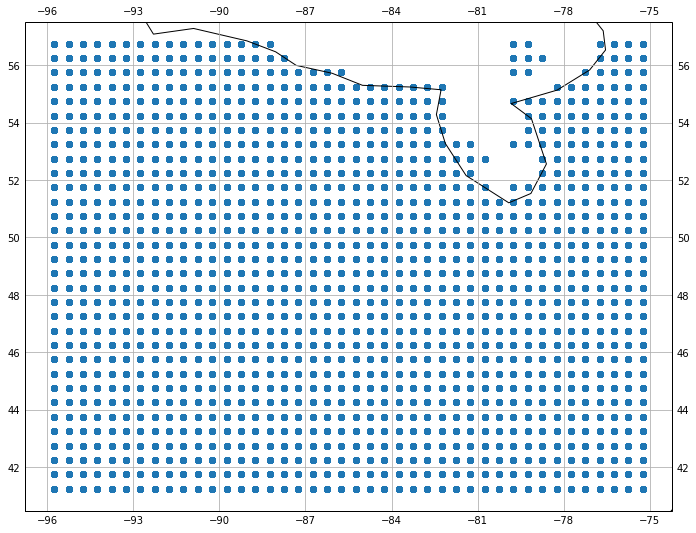

In [11]:
graph.figure(figsize=(16,9))
ax = graph.axes(projection=ccrs.PlateCarree())
ax.coastlines()
# ax.set_extent([-96, -75, 41, 57])
# ax.add_feature(land, facecolor='beige', zorder=4)

ax.gridlines(draw_labels=True)

graph.scatter(df_2['x'], df_2['y'])
graph.show()